# Adding topography to geological models
***
This chapter shows how to make geological models look more realistic by incorporating topography data:
- The data can either be stored in a raster file that can be conveniently loaded into gempy.
- For demonstration purposes GemPy also provides a tool to create a random hilly landscape to limit the models on the surface.

***

In [1]:
import sys
sys.path.append("../..")

import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import os

### 1. The common procedure to set up a model:

In [2]:
geo_model = gp.create_model('Single_layer_topo')

gp.init_data(geo_model, extent=[440720, 441129, 69280,69689,-200,250],resolution = (50,50,50),
                         path_i = os.pardir+"/input_data/onelayer_interfaces.csv",
                         path_o = os.pardir+"/input_data/onelayer_orient.csv")



Single_layer_topo  2019-04-26 11:44

In [3]:
# use happy spring colors! 
geo_model.surfaces.colors.change_colors({'layer1':'#ff8000','basement':'#88cc60'})

,surface,series,order_surfaces,isBasement,color,id
0,layer1,Default series,1,False,#ff8000,1
1,basement,Default series,2,True,#88cc60,2


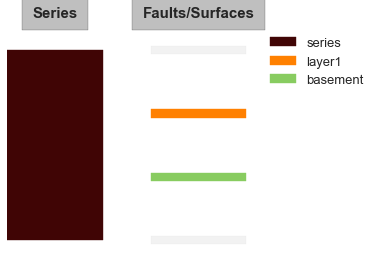

In [4]:
%matplotlib inline
gp.map_series_to_surfaces(geo_model, {'series':('layer1','basement')})

### 2. Adding topography

#### 2 a. Load from raster file

In [5]:
fp = os.pardir+"/input_data/bogota.tif"

[440720 471440  69280 100000] [512 512]
Cropped raster to geo_model.grid.extent.
[440720 441129  69280  69689] [7 7]
storing converted file...
showing...


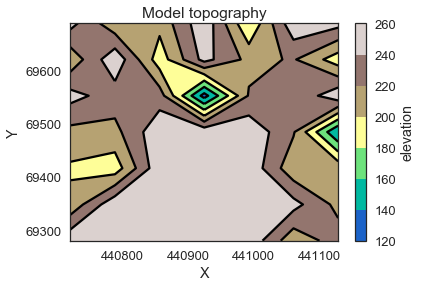

In [6]:
geo_model.add_topography(source='gdal',filepath=fp)

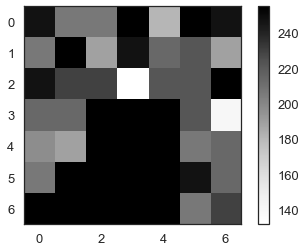

In [7]:
plt.imshow(geo_model.topography.topo.dem_zval)
plt.colorbar()

In [8]:
geo_model.topography._line_in_section()

Gefahr weil resolution


array([[69309,   255],
       [69367,   206],
       [69426,   197],
       [69484,   214],
       [69542,   247],
       [69601,   206],
       [69659,   247]])

In [9]:
geo_model.topography.topo.dem_zval.max(),geo_model.topography.topo.dem_zval.min()

(255, 132)

#### 2.b create fun topography

showing...


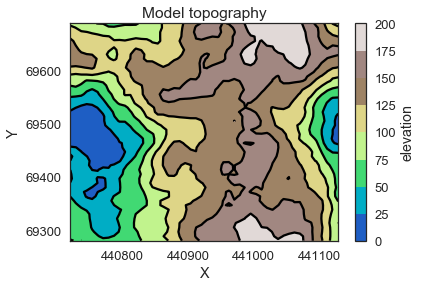

In [5]:
geo_model.add_topography(d_z=np.array([0,200]))

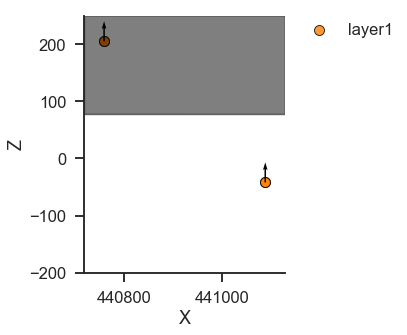

In [6]:
gp.plot.plot_data(geo_model)

In [7]:
gp.set_interpolation_data(geo_model,
                          output='geology', compile_theano=True,
                          theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [8]:
sol2 = gp.compute_model_at(geo_model.topography.values, geo_model, compute_mesh=False)

In [9]:
from gempy.plot.visualization_2d import PlotData2D

In [10]:
plot=PlotData2D(geo_model)

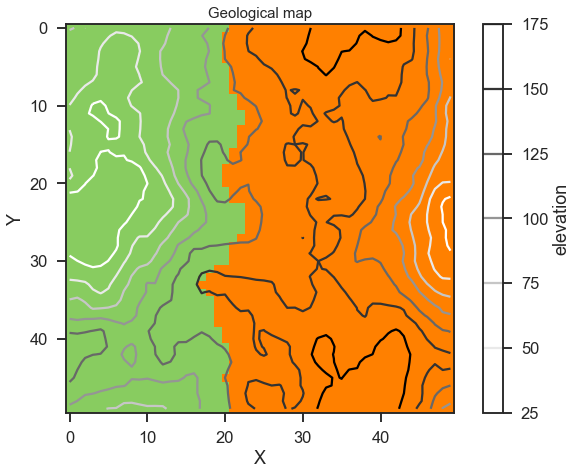

In [11]:
plot.plot_map(sol2)

In [10]:
geo_model.surfaces.modify_order_surfaces(1,0)

In [11]:
sol = gp.compute_model(geo_model)

In [13]:
geo_model.series

,order_series,BottomRelation
series,1,Erosion


In [15]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,layer1,series,1,False,#ff8000,1
1,basement,series,2,True,#88cc60,2


In [16]:
import copy

In [17]:
old_grid = copy.copy(geo_model.grid)

In [21]:
old_grid.values.shape

(125000, 3)

In [30]:
sol = gp.compute_model_at(old_grid.values, geo_model, compute_mesh=False)

In [25]:
geo_model.interpolator.set_initial_results_matrices()

In [32]:
sol.grid.values.shape

(125000, 3)

In [27]:
geo_model.solutions.grid.resolution

array([ 0.,  0.,  1.])

In [29]:
sol2.lith_block.shape

(2500,)

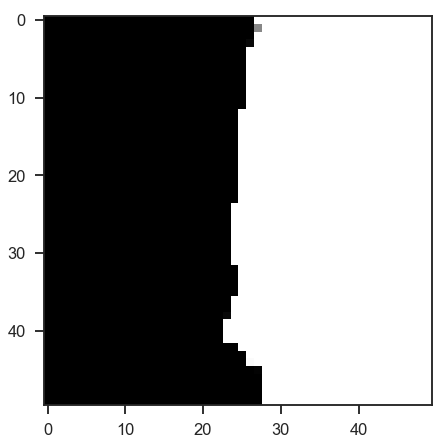

In [34]:
plt.imshow(sol2.lith_block.reshape(50,50),origin='upper')

In [ ]:
def plot_geomap(self, topography=None, geomap=None, plot_data=False, **kwargs):
    if plot_data:
        self.plot_data(direction='z', data_type='all')

    if geomap is None:
        if topography is None:
            raise AttributeError('There is no topography to generate a map from and no geomap defined')
        else:
            geomap_plot = topography.calculate_geomap(plot=False)
    else:
        geomap_plot = geomap
        assert geomap_plot.ndim == 2
        #print('hallo')

    im = plt.imshow(geomap_plot, origin="lower", extent=self._data.extent[:4],cmap=self._cmap, norm=self._norm)

    import matplotlib.patches as mpatches
    colors = [im.cmap(im.norm(value)) for value in self.formation_numbers]
    patches = [mpatches.Patch(color=colors[i], label=self.formation_names[i]) for i in range(len(self.formation_names))]
    if not plot_data:
        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title("Geological map", fontsize=15)

    return plt.gcf()

Text(0,0.5,'Y')

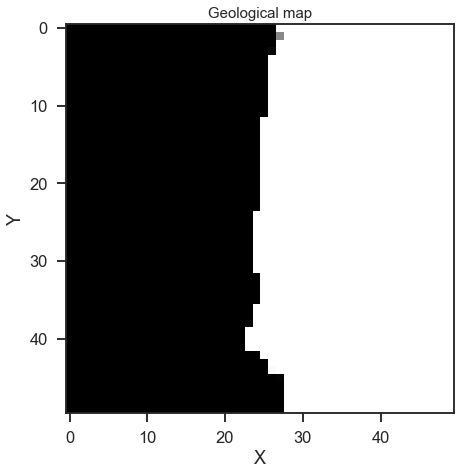

In [45]:
geomap

array([[ 2.,  2.,  2., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  1.,  1.,  1.],
       ..., 
       [ 2.,  2.,  2., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  1.,  1.,  1.]])

In [46]:
sol2.lith_block.reshape(50,50)

array([[ 2.,  2.,  2., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  1.,  1.,  1.],
       ..., 
       [ 2.,  2.,  2., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  1.,  1.,  1.],
       [ 2.,  2.,  2., ...,  1.,  1.,  1.]])

In [28]:
sol2.grid.values.shape

(2500, 3)

In [20]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=42, block_type='lithology',
                         direction='y', plot_data=True,show_faults=False)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
geo_model.topography._line_in_section()

This is wrong!